In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import feature_column
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from pandas.api.types import CategoricalDtype


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import tensorflow as tf
from sklearn.model_selection import train_test_split

from keras import callbacks

from numpy.random import seed
from keras.layers import Input,Dropout,LSTM,TimeDistributed,RepeatVector,Dense
from keras.models import Model,load_model
from keras import regularizers

In [3]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)
drive.mount('/content/drive')

Mounted at /gdrive
Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/master_5lakh (1).csv')

In [5]:
data.isnull().sum()

Unnamed: 0         0
date               0
user               0
L1                63
L2                63
L3                63
L4                63
L5                63
L6                63
L7                63
L8                63
L9                63
D1            428694
D2            428694
H1              1066
E1              4606
E2              4606
E3              4606
E4              4606
E5              4606
F1            389305
label              0
dtype: int64

In [6]:
data.drop(columns=['Unnamed: 0','D1','D2','F1'],axis=1,inplace=True)

In [7]:
data.isnull().sum()

date        0
user        0
L1         63
L2         63
L3         63
L4         63
L5         63
L6         63
L7         63
L8         63
L9         63
H1       1066
E1       4606
E2       4606
E3       4606
E4       4606
E5       4606
label       0
dtype: int64

In [8]:
data = data.fillna(0)

In [9]:
data.isnull().sum()

date     0
user     0
L1       0
L2       0
L3       0
L4       0
L5       0
L6       0
L7       0
L8       0
L9       0
H1       0
E1       0
E2       0
E3       0
E4       0
E5       0
label    0
dtype: int64

In [10]:
# Add column for year
data["Year"] = pd.to_datetime(data["date"], format="%Y-%m-%d").dt.year

# Add column for day
data["Day"] = pd.to_datetime(data["date"], format="%Y-%m-%d").dt.day

data["month"] = pd.to_datetime(data["date"], format="%Y-%m-%d").dt.month

In [11]:
data.drop('date',axis=1,inplace=True)

In [12]:
data.head(2)

,user,L1,L2,L3,L4,L5,L6,L7,L8,L9,H1,E1,E2,E3,E4,E5,label,Year,Day,month
0,ACH0008,6.0,60.0,0.5,0.0,1.0,1.0,1.0,1.0,33.0,111.0,12.0,45.0,4.0,4422637.0,57.0,0,2010,19,2
1,ISG2025,26.0,92.0,0.5,0.0,1.0,1.0,1.0,1.0,59.0,19.0,1.0,15.0,6.0,7355597.0,16.0,0,2011,28,2


In [13]:
data.drop('user',axis=1,inplace=True)

In [14]:
data['label'].value_counts()

0    500000
1        78
Name: label, dtype: int64

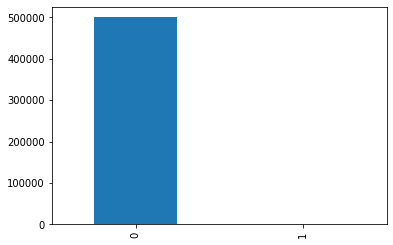

In [15]:
pd.value_counts(data['label']).plot.bar()

In [16]:
from sklearn.preprocessing import MinMaxScaler
data[['Year', 'Day','month']] = MinMaxScaler().fit_transform(data[['Year', 'Day','month']])

In [17]:


x = data.drop('label', axis=1).values
y = data.label.values

In [18]:
#train-test split
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split( x, y, test_size=0.20, random_state=0)

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(x, y)

In [20]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X_sm, y_sm, test_size=0.20, random_state=0)
X_train1.shape,X_test1.shape,y_train1.shape,y_test1.shape

((800000, 18), (200000, 18), (800000,), (200000,))

In [21]:

import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [22]:

max_review_length = 500
X_train1 = sequence.pad_sequences(X_train1, maxlen=max_review_length)
X_test1 = sequence.pad_sequences(X_test1, maxlen=max_review_length)

In [23]:
reshaped_train = X_train1.reshape(X_train1.shape[0],1,X_train1.shape[1])

In [48]:
# create the model
top_words = 100
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
model.fit(X_train1, y_train1, validation_data=(X_test1, y_test1), epochs=1, batch_size=512)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 500, 32)           3200      
                                                                 
 lstm_3 (LSTM)               (None, 100)               53200     
                                                                 
 dense_8 (Dense)             (None, 128)               12928     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 69,457
Trainable params: 69,457
Non-trainable params: 0
_________________________________________________________________
None
1563/1563 [==============================] - 120s 76ms/step - loss: 0.2393 - accuracy: 0.9128 - val_loss: 0.0595 - val_accuracy: 0.9754


In [34]:
# Final evaluation of the model
scores = model.evaluate(X_test1, y_test1, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 99.12%


In [35]:
yhat_probs = model.predict(X_test1, verbose=0)


In [47]:
from sklearn.metrics import classification_report
print(classification_report(yhat_probs.round(), y_test1))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    100503
         1.0       0.99      0.99      0.99     99497

    accuracy                           0.99    200000
   macro avg       0.99      0.99      0.99    200000
weighted avg       0.99      0.99      0.99    200000

